In [1]:
import pandas as pd
import tensorflow as tf
import scatter_plot

#read and parse the training set .csv features file 
df_train = pd.read_csv('Data/A2-ring/A2-ring-separable.txt', delimiter = '\t', header=None)


# construct an array of arrays of two-input features of the train set
input_train_columns = df_train.columns[0 : 2]
train_features = df_train[input_train_columns].values

# construct an array of size of output class labels target values
outputcolumn = df_train.columns[2]
train_labels = df_train[outputcolumn].values

x_train = train_features
y_train = train_labels



In [2]:
#read and parse the test set .csv features file
df_test = pd.read_csv('Data/A2-ring/A2-ring-test.txt', delimiter = '\t', header=None)

# construct an array of arrays of two-input features of the train set
input_test_columns = df_test.columns[0 : 2]
test_features = df_test[input_test_columns].values

# construct an array of size of output class labels target values
outputcolumn = df_test.columns[2]
test_labels = df_test[outputcolumn].values


x_test = test_features
y_test = test_labels


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1),
])

sgd = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=sgd, loss = "mse", metrics=["mae"])
model.fit(x_train, y_train, epochs=100, verbose="2")

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [4]:
import numpy as np
# predict the test values
y_test_predict = model.predict(x_test)
y_test_predict = np.abs(np.round(y_test_predict, decimals=0))
print(y_test_predict)

313/313 [==============================] - 1s 2ms/step
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_test_predict))
print("MSE: ", mean_squared_error(y_test, y_test_predict))
print("MAE: ", mean_absolute_error(y_test, y_test_predict))

# print("R2 score: ", r2_score(y_train, y_pred_train))
# print("MSE: ", mean_squared_error(y_train, y_pred_train))
# print("MAE: ", mean_absolute_error(y_train, y_pred_train))

R2 score:  0.9417415913328523
MSE:  0.0145
MAE:  0.0145


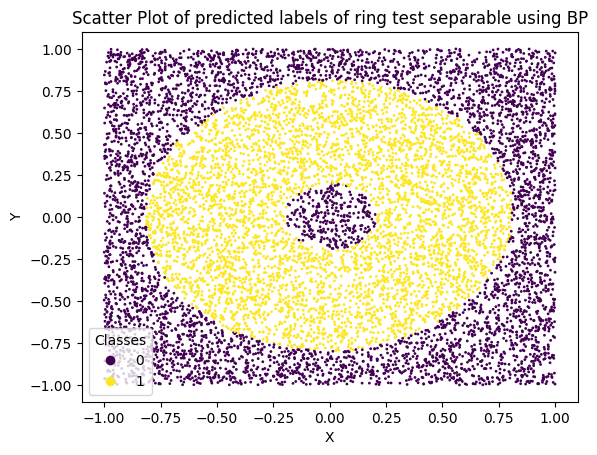

In [6]:
x1 = x_test[:,0]
x2 = x_test[:,1]
output = y_test_predict
sizes = np.full((1, output.shape[0]), 1)
scatter_plot.scatter_plot(x1, x2, output, sizes, 'Scatter Plot of predicted labels of ring test separable using BP')

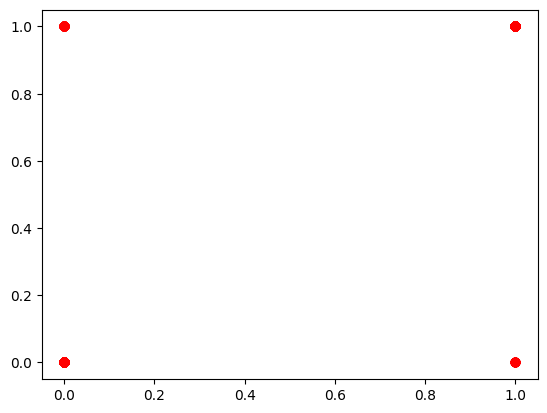

In [7]:
# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_test_predict, color = 'red')
#plt.scatter(y_train, y_pred_train, color = 'blue')